In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
rf_model = RandomForestRegressor(random_state = 42)

In [6]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

# Tahmin

In [13]:
rf_model.predict(X_test)

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833,
        357.71167,  196.535  ,  115.295  ,  730.72833,  474.68333,
        813.58167,  828.114  ,  510.1    ,  187.07   ,  354.625  ,
        998.59165,  880.67237,  102.845  ,  811.195  ,  270.9    ,
        379.16667,  882.34834,  703.28332,  689.4867 ,  381.375  ,
         80.245  ,  885.19739,  354.075  ,  750.51666,   96.48167,
         89.32   ,  573.115  ,  493.50006,  224.925  ,  256.63168,
        884.08665, 1365.18689,  214.265  ,  118.87   ,  505.91668,
         85.36   ,  128.15   ,  640.29833,  699.525  , 1370.59475,
        855.49995,  491.26667,  103.06   ,  179.25   ,  761.35333,
        836.40069,  576.96667,  735.95833,  188.545  ,  102.07   ,
        820.28497,  648.16667,  708.12498,  212.02003, 1384.87022,
       1151.56766,  551.675  ,  736.58333,  465.9    ,  593.03333,
         78.565  ])

In [14]:
y_pred = rf_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

# Model Tuning

In [17]:
rf_params = {"max_depth":list(range(1,10)),
            "max_features": [3,5,10,15],
            "n_estimators": [100,200,500,1000,2000]}

In [18]:
rf_model = RandomForestRegressor(random_state = 42)

In [19]:
rf_cv_model = GridSearchCV(rf_model,rf_params,
                           cv = 10,n_jobs = -1)

In [20]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [21]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [22]:
rf_tuned = RandomForestRegressor(max_depth = 8,max_features = 3,n_estimators = 200)

In [25]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [26]:
y_pred = rf_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

347.6596726825817

In [29]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

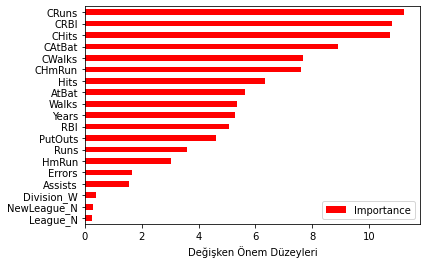

In [31]:
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind = "barh",
                                                                        color = "r")

plt.xlabel("Değişken Önem Düzeyleri")